<a href="https://colab.research.google.com/github/ivaben/DS-Unit-2-Applied-Modeling/blob/master/IVANA_BERNSTEIN_ass_1_applied_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
Complete these tasks for your project, and document your decisions.

[ ] Choose your target. Which column in your tabular dataset will you predict?

[ ] Is your problem regression or classification?
[ ] How is your target distributed?

Classification: How many classes? Are the classes imbalanced?

Regression: Is the target right-skewed? If so, you may want to log transform the target.

[ ] Choose your evaluation metric(s).

Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?


Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

[ ] Choose which observations you will use to train, validate, and test your model.

Are some observations outliers? Will you exclude them?
Will you do a random split or a time-based split?

[ ] Begin to clean and explore your data.

[ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
If you haven't found a dataset yet, do that today. Review requirements for your portfolio project and choose your dataset.

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ivaben/unit-2-project/master/train.csv'



In [0]:
train = pd.read_csv (url, encoding='iso-8859-1')

In [72]:
train.head()


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,...,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,"2,015",1,18,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0,0,13,429,7,7,7,15,0,0,1,750,0,17,0,-2,-17,...,0,0,0,0,0,9,12,8,10,5,8,0,1,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0,-0,-0,40,1,0,176,-0,-0
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,"2,012",1,15,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10,20,2418,109992,"1,826",23,23,39,30,7,1,989,2,3,40,-29,-1,...,10,0,0,0,0,"1,433","1,992","1,038","1,423",757,997,62,89,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0,3,3,"2,851",290,13,112,14,0
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,"2,006",1,7,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1,24,1443,73983,"1,229",19,19,33,63,10,1,"1,031",3,2,64,31,2,...,12,0,0,0,0,"1,301","1,051",986,826,734,606,71,46,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,4,1,5,"2,487",102,7,115,37,1
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,"2,010",1,3,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5,18,765,36603,608,20,20,36,38,6,1,959,2,3,31,-19,-2,...,4,2,0,0,0,460,605,339,467,259,340,22,34,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0,0,0,"1,074",130,18,105,6,0
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,"2,012",1,16,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4,133,1453,63592,"1,060",13,13,24,61,8,1,995,2,2,43,-10,-1,...,33,9,0,1,1,766,992,546,720,398,495,34,48,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0,1,1,"3,459",425,8,100,22,0


In [73]:
train.shape


(612, 154)

In [116]:
train.columns.values

array(['Salary', 'Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt',
       'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Last Name', 'First Name',
       'Position', 'Team', 'GP', 'G', 'A', 'A1', 'A2', 'PTS', '+/-',
       'E+/-', 'PIM', 'Shifts', 'TOI', 'TOIX', 'TOI/GP', 'TOI/GP.1',
       'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Pct%',
       'Diff', 'Diff/60', 'iCF', 'iCF.1', 'iFF', 'iSF', 'iSF.1', 'iSF.2',
       'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass',
       'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss', 'iGVA', 'iTKA', 'iBLK',
       'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW', 'iFOL', 'iFOW.1',
       'iFOL.1', 'FO%', '%FOT', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL',
       'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down',
       'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA',
       'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap',
       'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct',
       'S.Slap', 'S.

In [74]:
train.isna().sum() / len(train)*100


Salary    0
Born      0
City      0
Pr/St    25
Cntry     0
         ..
Grit      0
DAP       0
Pace      0
GS        0
GS/G      0
Length: 154, dtype: float64

In [0]:
train.fillna(0, inplace=True)

In [0]:
url1 = 'https://raw.githubusercontent.com/ivaben/unit-2-project/master/test.csv'

In [77]:
test = pd.read_csv (url1, encoding='iso-8859-1')
test.head()

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,...,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,88-11-05,Ithaca,NY,USA,USA,72,216,"2,003",1,13,R,Brown,Dustin,RW/LW,L.A,80,14,22,9,13,36,-4,8,22,1729,76801,"1,278",16,16,27,66,8,1,982,3,3,48,-4,-0,326,...,11,0,0,0,0,1239,1114,927,821,649,577,61,52,203,184,55,59,62,39,57,73,119,112,639,652,651,542,194,83,72,65,2,2,4,"3,418",243,20,110,47,1
1,00-02-29,Prague,NaN,CZE,CZE,72,195,"2,014",1,13,L,Vrana,Jakub,LW,WSH,21,3,3,2,1,6,2,0,2,291,13997,233,11,11,22,67,7,1,1037,2,1,75,6,2,56,...,1,0,0,0,0,282,179,201,132,134,98,14,8,53,24,9,3,11,8,13,15,24,23,91,85,75,83,42,26,16,10,0,0,1,826,15,10,119,9,0
2,92-04-24,St. Louis,MO,USA,USA,75,227,"2,007",6,161,L,Maroon,Patrick,LW,EDM,81,27,15,9,6,42,13,15,95,1715,81345,"1,352",17,17,30,54,10,1,1014,3,2,62,30,1,300,...,25,9,0,0,0,1500,1091,1116,791,809,581,82,53,322,186,77,47,55,31,65,77,120,108,555,661,511,486,298,184,77,86,4,2,6,"3,155",316,9,115,52,1
3,99-07-05,Piikkio,NaN,FIN,FIN,72,182,"2,013",2,55,L,Lehkonen,Artturi,LW,MTL,73,18,10,3,7,28,-1,3,8,1488,60702,"1,010",14,14,25,64,8,1,1007,3,2,54,6,0,279,...,4,0,0,0,0,1006,877,714,655,518,489,47,39,163,140,44,38,34,29,72,49,106,78,521,461,399,499,160,95,44,40,2,1,3,"3,044",105,24,112,38,1
4,96-10-27,Niagara Falls,NY,USA,USA,72,196,"2,011",2,36,R,Clendening,Adam,D,NYR,31,2,9,2,7,11,3,4,17,658,29406,490,16,16,29,48,9,1,1002,3,2,58,6,1,89,...,6,1,0,0,0,508,353,372,267,247,187,24,17,77,44,23,17,14,8,19,21,33,29,239,227,175,211,87,60,30,25,1,1,2,"1,217",67,5,105,16,1


In [78]:
test.isna().sum() / len(train)*100

Born     0
City     0
Pr/St   12
Cntry    0
Nat      0
        ..
Grit     0
DAP      0
Pace     0
GS       0
GS/G     0
Length: 153, dtype: float64

In [0]:
test.fillna(0, inplace=True)


In [80]:
url3 = 'https://raw.githubusercontent.com/ivaben/unit-2-project/master/test_salaries.csv'
salary_data = pd.read_csv(url3)
salary_data.head()

,Salary
0,"7,000,000"
1,"925,000"
2,"2,000,000"
3,"667,500"
4,"600,000"


In [81]:
test.shape

(262, 153)

In [0]:
# merge both train and test to one dataframe
df = pd.merge(train, test, on=[ 'Born',	'City',	'Pr/St',	'Cntry',	'Nat',	
                               'Ht',	'Wt',	'DftYr',	'DftRd',	'Ovrl',	'Hand',	'Last Name',
                               'First Name',	'Position',	'Team',	'GP',	'G',	'A',
                               'A1',	'A2',	'PTS',	'+/-',	'E+/-',	'PIM',	'Shifts',	
                               'TOI',	'TOIX',	'TOI/GP',	'TOI/GP.1',	'TOI%',	'IPP%',
                               'SH%',	'SV%',	'PDO',	'F/60',	'A/60',	'Pct%',	'Diff',
                               'Diff/60',	'iCF', 'iCF.1', 'iFF', 'iSF', 'iSF.1', 'iSF.2',
       'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass',
       'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss', 'iGVA', 'iTKA', 'iBLK',
       'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW', 'iFOL', 'iFOW.1',
       'iFOL.1', 'FO%', '%FOT', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL',
       'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down',
       'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA',
       'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap',
       'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct',
       'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'iPenT', 'iPenD',
       'iPENT', 'iPEND', 'iPenDf', 'NPD',		
                               'Min',	'Maj',	'Match',	'Misc',	
                               'Game',	'CF',	'CA',	'FF',	'FA',	'SF',	'SA',	'xGF',
                               'xGA',	'SCF',	'SCA',	'GF',	'GA',	'RBF',	'RBA',	'RSF',	'RSA',
                               'DSF',	'DSA',	'FOW',	'FOL',	'HF',	'HA',	'GVA',	'TKA',
                               'PENT',	'PEND',	'OPS',	'DPS',	'PS',	'OTOI',	'Grit',	'DAP',	'Pace',	'GS',	'GS/G'], how='left')

In [119]:
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,...,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,"2,015",1,18,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0,0,13,429,7,7,7,15,0,0,1,750,0,17,0,-2,-17,...,0,0,0,0,0,9,12,8,10,5,8,0,1,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0,-0,-0,40,1,0,176,-0,-0
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,"2,012",1,15,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10,20,2418,109992,"1,826",23,23,39,30,7,1,989,2,3,40,-29,-1,...,10,0,0,0,0,"1,433","1,992","1,038","1,423",757,997,62,89,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0,3,3,"2,851",290,13,112,14,0
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,"2,006",1,7,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1,24,1443,73983,"1,229",19,19,33,63,10,1,"1,031",3,2,64,31,2,...,12,0,0,0,0,"1,301","1,051",986,826,734,606,71,46,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,4,1,5,"2,487",102,7,115,37,1
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,"2,010",1,3,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5,18,765,36603,608,20,20,36,38,6,1,959,2,3,31,-19,-2,...,4,2,0,0,0,460,605,339,467,259,340,22,34,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0,0,0,"1,074",130,18,105,6,0
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,"2,012",1,16,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4,133,1453,63592,"1,060",13,13,24,61,8,1,995,2,2,43,-10,-1,...,33,9,0,1,1,766,992,546,720,398,495,34,48,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0,1,1,"3,459",425,8,100,22,0


In [120]:
df.shape

(612, 154)

In [0]:
df.isna().sum()/len(df)*100
df.fillna(0, inplace = True)

# Choose your target.
# Which column in your tabular dataset will you predict?

In [0]:
y = df['Salary']

In [124]:
y.describe()

count          612
mean     2,264,509
std      2,236,340
min        575,000
25%        742,500
50%        925,000
75%      3,500,000
max     13,800,000
Name: Salary, dtype: float64

# How is your target distributed?
Regression: Is the target right-skewed?

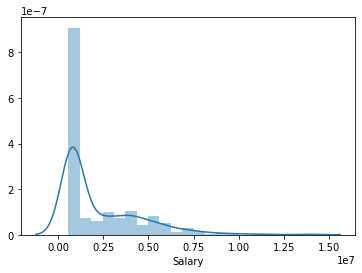

In [125]:
import seaborn as sns
sns.distplot(y);

# Log-Transform
If the target is right-skewed, you may want to "log transform" the target.

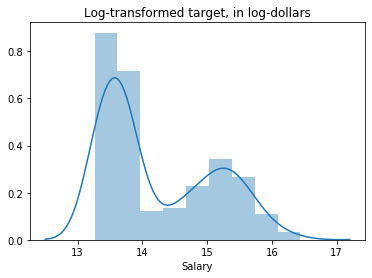

In [126]:
import numpy as np
import matplotlib.pyplot as plt
y_log = np.log1p(y)

sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

# Choose your evaluation metric(s)
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

# 1. Begin with baselines for regression

In [127]:
pd.options.display.float_format = '{:,.0f}'.format
df['Salary'].describe()

count          612
mean     2,264,509
std      2,236,340
min        575,000
25%        742,500
50%        925,000
75%      3,500,000
max     13,800,000
Name: Salary, dtype: float64

Avarage salary in NHL per player is $2,3 million . So that could be a reasonable first guess.

In [0]:
guess = df['Salary'].mean()

In [0]:
errors = guess - df['Salary']

In [0]:
mean_absolute_error = errors.abs().mean()

In [131]:
print(f'If we just guessed that every player in NHL earn ${guess:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed that every player in NHL earn $2,264,509,
we would be off by $1,775,263 on average.


In [132]:
# we can use more data for example goal score vs. Salary
import plotly.express as px
px.scatter(df, x='G', y='Salary')

# 2. Predictive Model

In [133]:
# trendline='ols'
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')
px.scatter(df, x='G', y='Salary', color='G', trendline ='ols')

In [97]:
test_data = pd.concat( [test, salary_data], axis = 1)
test_data.head()

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,...,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Salary
0,88-11-05,Ithaca,NY,USA,USA,72,216,"2,003",1,13,R,Brown,Dustin,RW/LW,L.A,80,14,22,9,13,36,-4,8,22,1729,76801,"1,278",16,16,27,66,8,1,982,3,3,48,-4,-0,326,...,0,0,0,0,1239,1114,927,821,649,577,61,52,203,184,55,59,62,39,57,73,119,112,639,652,651,542,194,83,72,65,2,2,4,"3,418",243,20,110,47,1,"7,000,000"
1,00-02-29,Prague,0,CZE,CZE,72,195,"2,014",1,13,L,Vrana,Jakub,LW,WSH,21,3,3,2,1,6,2,0,2,291,13997,233,11,11,22,67,7,1,1037,2,1,75,6,2,56,...,0,0,0,0,282,179,201,132,134,98,14,8,53,24,9,3,11,8,13,15,24,23,91,85,75,83,42,26,16,10,0,0,1,826,15,10,119,9,0,"925,000"
2,92-04-24,St. Louis,MO,USA,USA,75,227,"2,007",6,161,L,Maroon,Patrick,LW,EDM,81,27,15,9,6,42,13,15,95,1715,81345,"1,352",17,17,30,54,10,1,1014,3,2,62,30,1,300,...,9,0,0,0,1500,1091,1116,791,809,581,82,53,322,186,77,47,55,31,65,77,120,108,555,661,511,486,298,184,77,86,4,2,6,"3,155",316,9,115,52,1,"2,000,000"
3,99-07-05,Piikkio,0,FIN,FIN,72,182,"2,013",2,55,L,Lehkonen,Artturi,LW,MTL,73,18,10,3,7,28,-1,3,8,1488,60702,"1,010",14,14,25,64,8,1,1007,3,2,54,6,0,279,...,0,0,0,0,1006,877,714,655,518,489,47,39,163,140,44,38,34,29,72,49,106,78,521,461,399,499,160,95,44,40,2,1,3,"3,044",105,24,112,38,1,"667,500"
4,96-10-27,Niagara Falls,NY,USA,USA,72,196,"2,011",2,36,R,Clendening,Adam,D,NYR,31,2,9,2,7,11,3,4,17,658,29406,490,16,16,29,48,9,1,1002,3,2,58,6,1,89,...,1,0,0,0,508,353,372,267,247,187,24,17,77,44,23,17,14,8,19,21,33,29,239,227,175,211,87,60,30,25,1,1,2,"1,217",67,5,105,16,1,"600,000"


# 3. Follow the 5 step process, and refer to Scikit-Learn LinearRegression documentation.

In [98]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['G']
target = 'Salary'
X_train = df[features]
y_train = df[target]

# 4. Fit the model
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# 5. Apply the model to new data
Goals = 30
X_test = [[Goals]]
y_pred = model.predict(X_test)

y_pred

array([5353794.74959698])

In [0]:
# Use train and test dataset

In [101]:
# numeric columns
train.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,612,"2,264,509","2,236,340","575,000","742,500","925,000","3,500,000","13,800,000"
Ht,612,73,2,67,72,73,74,81
Wt,612,201,15,160,190,200,210,265
DftYr,612,"1,681",743,0,"2,003","2,008","2,012","2,016"
DftRd,612,2,2,0,1,2,3,9
...,...,...,...,...,...,...,...,...
Grit,612,132,104,0,47,118,195,622
DAP,612,9,8,0,5,8,12,61
Pace,612,109,10,0,104,109,114,176
GS,612,22,22,-4,3,16,35,99


In [102]:
# not numeric columns
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Hand,612,2,L,379
Nat,612,16,CAN,289
Cntry,612,18,CAN,291
Position,612,18,D,203
Pr/St,612,38,0,153
Team,612,68,NSH,25
First Name,612,308,Matt,15
City,612,373,Toronto,26
Last Name,612,573,Smith,5
Born,612,576,93-03-26,3


In [103]:
train['Hand'].value_counts()

L    379
R    233
Name: Hand, dtype: int64

In [104]:
train.groupby('Hand')['Salary'].mean()

Hand
L   2,309,669
R   2,191,052
Name: Salary, dtype: float64

In [0]:
# exclude non-numeric columns from our features for now.

In [0]:
target = 'Salary'
high_cardinality = ['Nat', 'Cntry', 'Position', 'Pr/St', 'Team', 'First Name', 'Last Name', 'Born']
features = train.columns.drop([target] + high_cardinality)

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test_data[features]
y_test = test_data[target]

# Mean baseline

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train = train['Salary']
y_test = test_data['Salary']
y_pred_train = [y_train.mean()] * len(y_train)
y_pred_test  = [y_train.mean()] * len(y_test)

In [109]:
print('Mean Baseline:')
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Train R^2 Score:', r2_score(y_train, y_pred_train))
print('Test R^2 Score:', r2_score(y_test, y_pred_test))

Mean Baseline:
Train Root Mean Squared Error: 2234512.183982693
Test Root Mean Square Error: 2439059.283207637
Train Mean Absolute Error: 1775263.437006066
Test Mean Absolute Error: 1929509.6327770294
Train R^2 Score: 0.0
Test R^2 Score: -0.0069583691125219005


# Get regression metrics RMSE, MAE, and  R2 , for both the train and test data.

In [0]:
from sklearn.linear_model import LinearRegression

def lr(train, test, features, target):
    X_train = train[features]
    y_train = train[target]
    X_test = test_data[features]
    y_test = test_data[target]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Linear Regression with {len(features)} features')
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, features)
    print(coefficients.to_string())
    
    print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
    print('Test Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
    print('Train R^2 Score:', r2_score(y_train, y_pred_train))
    print('Test R^2 Score:', r2_score(y_test, y_pred_test))

In [111]:
target = 'Salary'
features = ['Ht', 'Wt']
lr(train, test_data, features, target)

Linear Regression with 2 features
Intercept 2244641.9552362785
Ht   -101,749
Wt     37,091
Train Root Mean Squared Error: 2193168.3425104013
Test Root Mean Square Error: 2422484.097874166
Train Mean Absolute Error: 1714229.118251588
Test Mean Absolute Error: 1871290.8325143338
Train R^2 Score: 0.036662464039992404
Test R^2 Score: 0.006681159517880286


In [112]:
# add more features

features = ['Ht', 'Wt', 'DftYr', 'Grit']
lr(train, test_data, features, target)

Linear Regression with 4 features
Intercept 5178547.18173678
Ht      -117,149
Wt        19,640
DftYr        484
Grit       6,686
Train Root Mean Squared Error: 2054735.628696406
Test Root Mean Square Error: 2274190.6381490845
Train Mean Absolute Error: 1519685.2881105999
Test Mean Absolute Error: 1662086.0586219768
Train R^2 Score: 0.15443606913352792
Test R^2 Score: 0.12457178862202622
